In [1]:
#load package
using Revise
using Plots
using LaTeXStrings
using LinearAlgebra
using SparseIR
using Nevanlinna

[ Info: Precompiling Nevanlinna [0b21cfa8-e591-48a4-a07b-a9d20be7c264]


In [2]:
# Set work data Type
T = BigFloat
setprecision(2048)
;

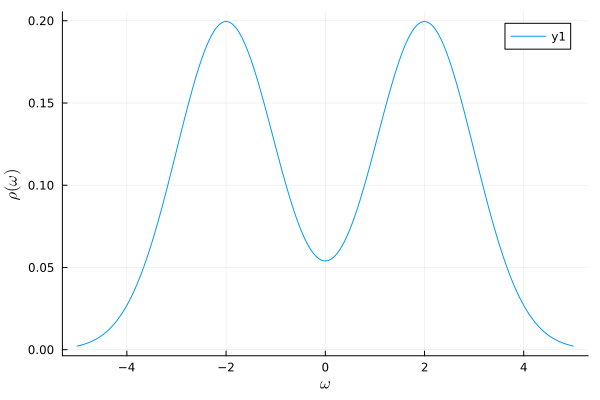

In [3]:
#define spectral function
gaussian(x, mu, sigma) = exp(-0.5*((x-mu)/sigma)^2)/(sqrt(2*π)*sigma)
#rho(omega) = gaussian(omega, 0.0, 1.0)
rho(omega) = 0.5*gaussian(omega, 2.0, 1.0) + 0.5*gaussian(omega, -2.0, 1.0)
omegas = LinRange(-5, 5, 1000)
plot()
plot!(omegas, rho.(omegas), xlabel=latexstring("\\omega"), ylabel=latexstring("\\rho(\\omega)"))

In [4]:
function generate_input_data(rho::Function, beta::Float64)
    lambda = 1e+4
    wmax = lambda/beta
    basis = FiniteTempBasisSet(beta, wmax, 1e-15)

    rhol = [overlap(basis.basis_f.v[l], rho) for l in 1:length(basis.basis_f)]
    gl = - basis.basis_f.s .* rhol
    gw = evaluate(basis.smpl_wn_f, gl)
    
    hnw = length(basis.smpl_wn_f.sampling_points)÷2
    
    input_smpl = Array{Complex{T}}(undef, hnw) 
    input_gw   = Array{Complex{T}}(undef, hnw) 
    
    for i in 1:hnw
        input_smpl[i]= SparseIR.valueim(basis.smpl_wn_f.sampling_points[hnw+i], beta)
        input_gw[i]  = gw[hnw+i]
    end
    
    return input_smpl, input_gw
end

generate_input_data (generic function with 1 method)

In [5]:
beta = 100. #inverse temperature
input_smpl, input_gw = generate_input_data(rho, beta)
;

In [6]:
N_real    = 1000  #demension of array of output
omega_max = 10.0  #energy cutoff of real axis
eta       = 0.001 #broaden parameter 
sum_rule  = 1.0   #sum rule
H_max     = 50    #cutoff of Hardy basis
lambda    = 1e-4  #regularization parameter
iter_tol  = 1000  #upper bound of iteration
;

In [7]:
#moments = Complex{T}.([1, 0, 1, 0, 3, 0, 15, 0, 105, 0, 945])
#moments = Complex{T}.([1, 0, 1])
#moments = Complex{T}.([1])

moments = Complex{T}.([1, 0, 5, 0, 43, 0, 499, 0, 7193, 0, 123109, 0, 2430355, 0, 54229907])
#moments = Complex{T}.([1, 0, 5, 0, 43])

15-element Vector{Complex{BigFloat}}:
           1.0 + 0.0im
           0.0 + 0.0im
           5.0 + 0.0im
           0.0 + 0.0im
          43.0 + 0.0im
           0.0 + 0.0im
         499.0 + 0.0im
           0.0 + 0.0im
        7193.0 + 0.0im
           0.0 + 0.0im
      123109.0 + 0.0im
           0.0 + 0.0im
  2.430355e+06 + 0.0im
           0.0 + 0.0im
 5.4229907e+07 + 0.0im

In [14]:
wo_ham_nev_sol = Nevanlinna.HamburgerNevanlinnaSolver(moments, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

Rank of Hankel matrix:8
Non-degenerate
Postive semi-definite
Non-singular
Positive definite
Proper
N_imag is setted as 27


In [21]:
ham_nev_sol = Nevanlinna.HamburgerNevanlinnaSolver(moments, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=true)
;

Rank of Hankel matrix:8
Non-degenerate
Postive semi-definite
Non-singular
Positive definite
Proper
N_imag is setted as 27
H=1
Iter     Function value   Gradient norm 
     0     1.783305e+00     5.789275e-01
 * time: 0.00026798248291015625
     1     1.566034e+00     8.990416e-01
 * time: 1.6040301322937012
     2     1.550331e+00     7.776651e-01
 * time: 4.074406147003174
     3     1.484337e+00     2.060582e-01
 * time: 5.741317987442017
     4     1.481670e+00     2.599316e-02
 * time: 7.388070106506348
     5     1.481442e+00     1.841400e-02
 * time: 9.00717306137085
     6     1.481401e+00     5.432746e-03
 * time: 10.61339807510376
     7     1.481397e+00     2.740522e-03
 * time: 12.277345180511475
     8     1.481397e+00     7.734086e-04
 * time: 13.943396091461182
     9     1.481396e+00     3.898858e-04
 * time: 16.520477056503296
    10     1.481396e+00     4.868451e-05
 * time: 18.344372034072876
    11     1.481396e+00     2.280238e-05
 * time: 21.187763214111328
    12 

In [ ]:
Nevanlinna.solve!(ham_nev_sol)

H=1
Iter     Function value   Gradient norm 
     0     1.481396e+00     2.547872e-09
 * time: 0.0002079010009765625
max_theta=0.329586983270122170729270621522741459415748661436548379911347234780758104750811222673473296481823135192422632265197098324981408136286626327810108526851439251899983282857117134987424093372339027158075265380623846324131351428110826011895316970149239797749688516294506296159267879103219385209198341855834547988410013112842220410272235001634337011988738874040394282378161817697918960845080403852882727861977518689793447063580815181493492749289969914992087139212055285304944450459265653601781758239454142710326582432374678942790624851822260620303825798683226751568332991488216053506803514623218256809816609501469604732522477
hardy optimization was success.
H=2
Iter     Function value   Gradient norm 
     0     1.481396e+00     8.901554e-01
 * time: 0.0002090930938720703
     1     1.421371e+00     5.216901e-01
 * time: 1.6843671798706055
     2     1.394292e+00     8.1693

    49     1.018817e+00     3.036235e-06
 * time: 100.05107998847961
    50     1.018817e+00     2.234967e-06
 * time: 102.06321215629578
    51     1.018817e+00     1.463843e-06
 * time: 103.91737699508667
    52     1.018817e+00     8.581344e-07
 * time: 105.98626613616943
    53     1.018817e+00     1.300799e-06
 * time: 108.21013593673706
    54     1.018817e+00     7.910661e-07
 * time: 110.22024297714233
    55     1.018817e+00     7.688875e-07
 * time: 112.1597490310669
    56     1.018817e+00     3.919458e-07
 * time: 114.00079202651978
    57     1.018817e+00     4.116325e-07
 * time: 115.89376997947693
    58     1.018817e+00     2.806873e-07
 * time: 118.14775705337524
    59     1.018817e+00     2.976833e-07
 * time: 120.38527011871338
    60     1.018817e+00     1.681178e-07
 * time: 122.43954801559448
    61     1.018817e+00     1.477742e-07
 * time: 124.3894510269165
    62     1.018817e+00     1.010304e-07
 * time: 126.33511710166931
    63     1.018817e+00     1.076701

    85     8.809833e-01     6.427901e-08
 * time: 171.48952102661133
    86     8.809833e-01     9.037516e-08
 * time: 173.4310760498047
    87     8.809833e-01     4.603840e-08
 * time: 175.38317203521729
    88     8.809833e-01     6.344162e-08
 * time: 177.36252999305725
    89     8.809833e-01     4.073805e-08
 * time: 179.2223629951477
    90     8.809833e-01     4.990112e-08
 * time: 181.11195421218872
    91     8.809833e-01     2.686902e-08
 * time: 183.074609041214
    92     8.809833e-01     3.665038e-08
 * time: 185.07073402404785
    93     8.809833e-01     2.376640e-08
 * time: 187.11779499053955
    94     8.809833e-01     2.809007e-08
 * time: 189.3237841129303
    95     8.809833e-01     1.401427e-08
 * time: 191.52740812301636
    96     8.809833e-01     2.174126e-08
 * time: 193.6196641921997
    97     8.809833e-01     1.454027e-08
 * time: 196.024640083313
    98     8.809833e-01     1.539495e-08
 * time: 197.85870218276978
    99     8.809833e-01     9.141222e-09
 

    95     7.444658e-01     2.054934e-06
 * time: 207.43642497062683
    96     7.444658e-01     1.854602e-06
 * time: 209.59061408042908
    97     7.444658e-01     1.670673e-06
 * time: 211.53589606285095
    98     7.444658e-01     1.562779e-06
 * time: 213.89615201950073
    99     7.444658e-01     1.313695e-06
 * time: 218.1059648990631
   100     7.444658e-01     1.296873e-06
 * time: 220.26695895195007
   101     7.444658e-01     1.231339e-06
 * time: 222.15880799293518
   102     7.444658e-01     1.150213e-06
 * time: 224.17942094802856
   103     7.444658e-01     1.125864e-06
 * time: 226.12344694137573
   104     7.444658e-01     1.047046e-06
 * time: 228.13149309158325
   105     7.444658e-01     9.628442e-07
 * time: 230.11942100524902
   106     7.444658e-01     8.996703e-07
 * time: 232.036523103714
   107     7.444658e-01     7.799043e-07
 * time: 234.06162095069885
   108     7.444658e-01     7.272915e-07
 * time: 236.55360388755798
   109     7.444658e-01     6.191546e

    42     6.056789e-01     2.570916e-03
 * time: 101.03370404243469
    43     6.056765e-01     1.217211e-03
 * time: 103.4684669971466
    44     6.056757e-01     1.182946e-03
 * time: 105.93133592605591
    45     6.056747e-01     7.086185e-04
 * time: 109.01704597473145
    46     6.056742e-01     9.319899e-04
 * time: 110.92405009269714
    47     6.056733e-01     9.324780e-04
 * time: 114.5311861038208
    48     6.056728e-01     8.726574e-04
 * time: 116.47496390342712
    49     6.056722e-01     5.549031e-04
 * time: 119.203458070755
    50     6.056718e-01     6.137999e-04
 * time: 120.99536490440369
    51     6.056714e-01     7.278373e-04
 * time: 123.97057890892029
    52     6.056710e-01     5.594604e-04
 * time: 126.02249312400818
    53     6.056706e-01     6.063519e-04
 * time: 129.41398000717163
    54     6.056703e-01     4.683000e-04
 * time: 131.2223699092865
    55     6.056700e-01     4.137884e-04
 * time: 133.94316005706787
    56     6.056697e-01     2.409149e-0

   162     6.056683e-01     5.405126e-07
 * time: 358.8301610946655
   163     6.056683e-01     6.119336e-07
 * time: 360.61744689941406
   164     6.056683e-01     5.425194e-07
 * time: 362.45734095573425
   165     6.056683e-01     6.774671e-07
 * time: 364.2645869255066
   166     6.056683e-01     5.769642e-07
 * time: 366.1206970214844
   167     6.056683e-01     6.832306e-07
 * time: 368.03352403640747
   168     6.056683e-01     5.722248e-07
 * time: 369.8484420776367
   169     6.056683e-01     6.253895e-07
 * time: 371.74924898147583
   170     6.056683e-01     5.170771e-07
 * time: 374.2544529438019
   171     6.056683e-01     5.255361e-07
 * time: 375.9930651187897
   172     6.056683e-01     4.233951e-07
 * time: 377.81521701812744
   173     6.056683e-01     4.293404e-07
 * time: 379.6309139728546
   174     6.056683e-01     3.497399e-07
 * time: 381.5439291000366
   175     6.056683e-01     3.552989e-07
 * time: 383.4116439819336
   176     6.056683e-01     2.666314e-07
 *

    24     4.271153e-01     1.909921e-03
 * time: 54.8010311126709
    25     4.271104e-01     1.509657e-03
 * time: 56.69465708732605
    26     4.271069e-01     1.246783e-03
 * time: 58.67538619041443
    27     4.271046e-01     8.393661e-04
 * time: 61.226163148880005
    28     4.271030e-01     1.237698e-03
 * time: 63.0043511390686
    29     4.271019e-01     7.112044e-04
 * time: 64.79623818397522
    30     4.271010e-01     6.563210e-04
 * time: 66.61335706710815
    31     4.271004e-01     4.129029e-04
 * time: 68.42885613441467
    32     4.271000e-01     3.653242e-04
 * time: 70.20874309539795
    33     4.270997e-01     3.898659e-04
 * time: 72.02269411087036
    34     4.270994e-01     3.198578e-04
 * time: 74.01376700401306
    35     4.270993e-01     3.699282e-04
 * time: 77.55648803710938
    36     4.270991e-01     2.744729e-04
 * time: 79.31310606002808
    37     4.270989e-01     2.646118e-04
 * time: 81.09633803367615
    38     4.270988e-01     2.390007e-04
 * time:

   144     4.270961e-01     1.732279e-06
 * time: 304.26498103141785
   145     4.270961e-01     2.034361e-06
 * time: 306.7902731895447
   146     4.270961e-01     1.783011e-06
 * time: 308.6487820148468
   147     4.270961e-01     1.901288e-06
 * time: 310.5372371673584
   148     4.270961e-01     1.811608e-06
 * time: 312.3606631755829
   149     4.270961e-01     1.818831e-06
 * time: 314.45084619522095
   150     4.270961e-01     1.794132e-06
 * time: 316.74853515625
   151     4.270961e-01     1.750305e-06
 * time: 318.89279103279114
   152     4.270961e-01     1.749699e-06
 * time: 320.7081460952759
   153     4.270961e-01     1.660964e-06
 * time: 322.81129121780396
   154     4.270961e-01     1.643096e-06
 * time: 324.7409420013428
   155     4.270961e-01     1.536358e-06
 * time: 326.6041100025177
   156     4.270961e-01     1.421971e-06
 * time: 328.39248919487
   157     4.270961e-01     1.386414e-06
 * time: 330.3288571834564
   158     4.270961e-01     1.218061e-06
 * time

   265     4.270961e-01     2.720717e-08
 * time: 543.0607421398163
   266     4.270961e-01     2.429118e-08
 * time: 544.9064681529999
   267     4.270961e-01     2.549879e-08
 * time: 546.7484710216522
   268     4.270961e-01     2.169787e-08
 * time: 548.5589921474457
   269     4.270961e-01     2.241657e-08
 * time: 550.4526700973511
   270     4.270961e-01     1.954697e-08
 * time: 552.8947582244873
   271     4.270961e-01     1.948771e-08
 * time: 554.6427941322327
   272     4.270961e-01     1.770401e-08
 * time: 556.4162261486053
   273     4.270961e-01     1.862420e-08
 * time: 558.2002069950104
   274     4.270961e-01     1.794583e-08
 * time: 559.9653401374817
   275     4.270961e-01     1.758028e-08
 * time: 561.8650510311127
   276     4.270961e-01     1.846966e-08
 * time: 564.2874231338501
   277     4.270961e-01     1.625450e-08
 * time: 566.057694196701
   278     4.270961e-01     1.802013e-08
 * time: 567.8236300945282
   279     4.270961e-01     1.464099e-08
 * time:

In [11]:
wo_sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

N_imag is setted as 33


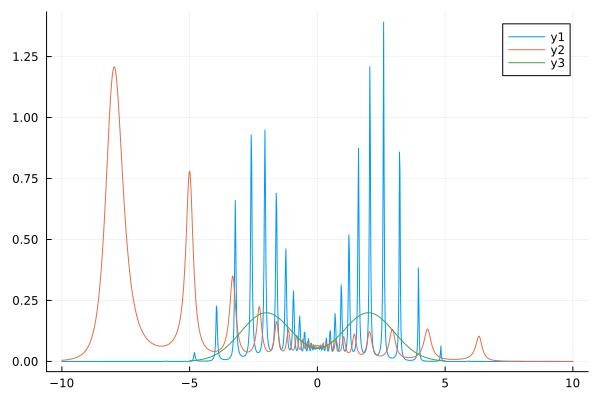

In [17]:
plot()
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val)/pi)
plot!(Float64.(real.((wo_ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(wo_ham_nev_sol.val))/pi)
#plot!(Float64.(real.((ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(ham_nev_sol.val))/pi)
plot!(omegas, rho.(omegas))
#savefig("picture.png")

In [18]:
plot(xlim = [-6,6],
    legend = :topright,
    #ymirror = true, 
    xticks = [5,0,-5],
    yticks = [0.3,0,-0.3],
    xtickfont=font(15), 
    ytickfont=font(15), 
    guidefont=font(25), 
    legendfont=font(20))
plot!(xlabel=latexstring("\\omega"))
plot!(ylabel=latexstring("\\rho"))
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val/pi),label="non-opt",lw=3)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val)/pi),label="opt",lw=3)
plot!(omegas, rho.(omegas), label="exact",lw=1.5,ls=:dash,lc=:black)
#savefig("two_peak.svg")

LoadError: UndefVarError: sol not defined